[*********************100%%**********************]  1 of 1 completed


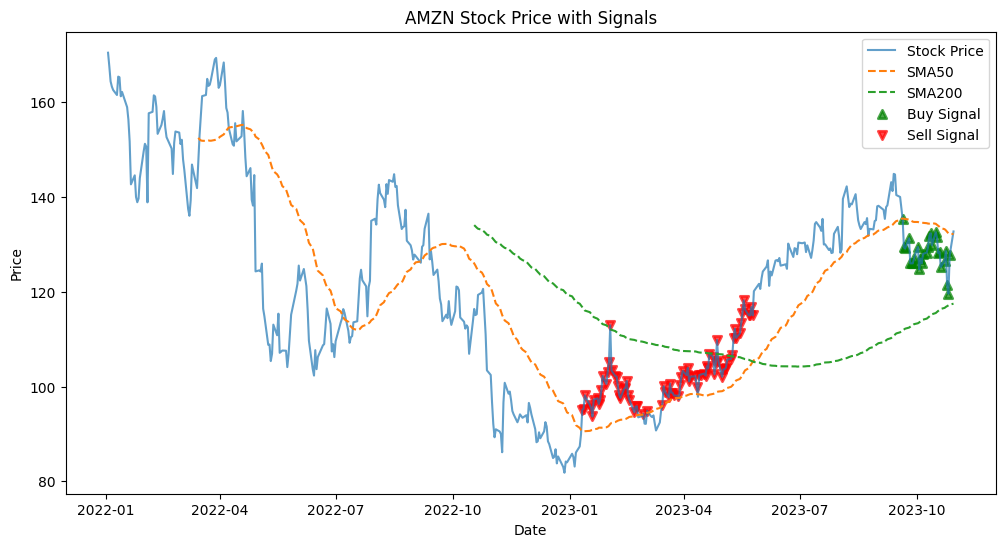

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock symbol and date range
stock_symbol = "AMZN"
start_date = "2022-01-01"
end_date = "2023-10-31"

# Fetch historical stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate simple moving averages (SMA) for 50 and 200 days
stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()

# Define value investing criteria and technical indicators
def get_signal(row):
    if row['SMA50'] > row['SMA200'] and row['Close'] < row['SMA50']:
        return "Buy"
    elif row['SMA50'] < row['SMA200'] and row['Close'] > row['SMA50']:
        return "Sell"
    else:
        return "Hold"

# Apply the signal function to the DataFrame
stock_data['Signal'] = stock_data.apply(get_signal, axis=1)

# Visualize the stock price and signals
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA50'], label='SMA50', linestyle='--')
plt.plot(stock_data.index, stock_data['SMA200'], label='SMA200', linestyle='--')
plt.title(f'{stock_symbol} Stock Price with Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Highlight buy and sell signals
buy_signals = stock_data[stock_data['Signal'] == 'Buy']
sell_signals = stock_data[stock_data['Signal'] == 'Sell']
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal', lw=2, alpha=0.7)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal', lw=2, alpha=0.7)

plt.legend()
plt.show()
